In [5]:

#importing libraries
!pip install tqdm
import h5py
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from tqdm import tqdm
import torch
from torchvision import transforms
transform=transforms.Compose([
                      transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225]),
                  ])
import pickle
from matplotlib import cm as c
from model import CSRNet

In [6]:

from torchvision import datasets, transforms
transform=transforms.Compose([
                      transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225]),
                  ])

#defining the location of dataset
root = 'C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech'
part_A_train = os.path.join(root,'part_A/train_data','images')
part_A_test = os.path.join(root,'part_A/test_data','images')
part_B_train = os.path.join(root,'part_B/train_data','images')
part_B_test = os.path.join(root,'part_B/test_data','images')
path_sets = [part_A_test]
#defining the image path
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        print(img_path)
        img_paths.append(img_path)
print(len(img_paths))
model = CSRNet()
#defining the model
model = model.cuda()
#loading the trained weights
checkpoint = torch.load('123model_best.pth.tar')
model.load_state_dict(checkpoint['state_dict'])

0


/home/diptam.paul/Documents/PythonTasks/CrowdDensity/env/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/diptam.paul/Documents/PythonTasks/CrowdDensity/env/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AssertionError: Torch not compiled with CUDA enabled

In [3]:
mae = 0
for i in tqdm(range(len(img_paths))):
    img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground-truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
print (mae/len(img_paths))

100%|██████████| 182/182 [02:03<00:00,  1.47it/s]

72.56859087682032


tensor([[[[0.0142, 0.0139, 0.0186,  ..., 0.0154, 0.0157, 0.0232],
          [0.0152, 0.0069, 0.0096,  ..., 0.0466, 0.0520, 0.0466],
          [0.0145, 0.0158, 0.0131,  ..., 0.0915, 0.0729, 0.0483],
          ...,
          [0.0347, 0.0394, 0.0837,  ..., 0.0061, 0.0129, 0.0142],
          [0.0306, 0.0279, 0.0341,  ..., 0.0220, 0.0157, 0.0067],
          [0.0459, 0.0292, 0.0242,  ..., 0.0207, 0.0229, 0.0165]]]],
       device='cuda:0', grad_fn=<ConvolutionBackward0>)
Predicted Count :  402


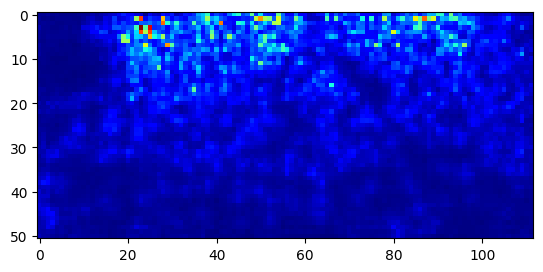

Original Count :  382


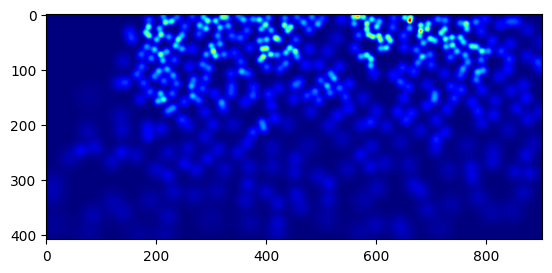

Original Image


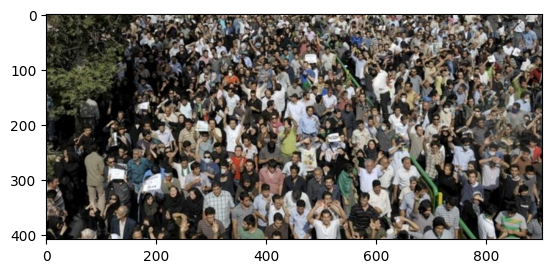

In [6]:
from matplotlib import cm as c
img = transform(Image.open('C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\images\IMG_100.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print(output)
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\ground-truth\IMG_100.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\images\IMG_100.jpg'))
plt.show()

In [5]:
import pickle

# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))

NameError: name 'model' is not defined

In [4]:
pickled_model = pickle.load(open('finalized_model.pkl', 'rb'))

# img = transform(Image.open('C://Users/dipta/Downloads/istockphoto-171156111-612x612.jpg').convert('RGB')).cuda()

img = transform(Image.open('C://Users/dipta/Downloads/nk_5_exam_0502chn_122_8.jpg').convert('RGB')).cuda()

output = pickled_model(img.unsqueeze(0))
# print(output)
# print(output.detach().cpu())
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
# temp = h5py.File('C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech/part_A/test_data/ground-truth/IMG_115.h5', 'r')
# temp_1 = np.asarray(temp['density'])
# plt.imshow(temp_1,cmap = c.jet)
# print("Original Count : ",int(np.sum(temp_1)) + 1)
# plt.show()
print("Original Image")
plt.imshow(plt.imread('C://Users/dipta/Downloads/nk_5_exam_0502chn_122_8.jpg'))
plt.show()

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [39]:
ps, ns = [], []
for i in range(len(temp)):
    if(np.average(temp[i]) < 0):
        ns.append(temp[i])
    else:
        ps.append(temp[i])

In [13]:
ps, ns = [], []
for i in range(len(temp)):
    for j in range(len(temp[i])):
        if temp[i][j] > 0:
            ps.append(temp[i][j])
        else:
            ns.append(temp[i][j])

In [14]:
print(len(ps))
print(len(ns))

4097
2670


In [3]:
pickled_model = pickle.load(open('finalized_model.pkl', 'rb'))

# img = transform(Image.open('C://Users/dipta/Downloads/istockphoto-171156111-612x612.jpg').convert('RGB')).cuda()

images_list = ['C://Users/dipta/Downloads/istockphoto-171156111-612x612.jpg', 'C://Users/dipta/Downloads/nk_5_exam_0502chn_122_8.jpg',
'C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\images\IMG_114.jpg', 
'C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\images\IMG_110.jpg', 
'C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\images\IMG_115.jpg',
'C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\images\IMG_116.jpg',
'C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\images\IMG_117.jpg',
'C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\images\IMG_118.jpg',
'C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\images\IMG_119.jpg']

for img_name in images_list:
    img = transform(Image.open(img_name).convert('RGB')).cuda()
    output = pickled_model(img.unsqueeze(0))
    print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
    temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
    plt.imshow(temp,cmap = c.jet)
    plt.show()
    print("Original Image")
    plt.imshow(plt.imread(img_name))
    plt.show()
    ps, ns = [], []
    for i in range(len(temp)):
        for j in range(len(temp[i])):
            if temp[i][j] > 0:
                ps.append(temp[i][j])
            else:
                ns.append(temp[i][j])
    print(len(ps))
    print(len(ns))
    print(f"Ratio {len(ps)/len(ns)}")

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.